In [1]:
print("\033[43;30mComparação entre o catálogo  Abell426(2MASS) do ds9 e o do produzido pelo sep.extractor\033[m")

Comparação entre o catálogo  Abell426(2MASS) do ds9 e o do produzido pelo sep.extractor


In [2]:
import numpy as np
import sep
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = [10., 8.]

Reading imagem and plot


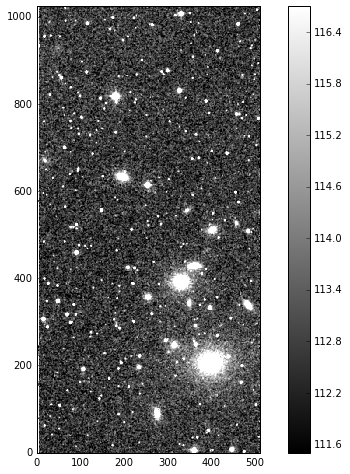

In [3]:
print 'Reading imagem and plot'
data = fits.getdata('Abell426.fits') #imagem do ds9

plt.imshow(data, interpolation = 'nearest',vmax = 116.7, vmin = 111.5, cmap='gray',origin='lower')
plt.colorbar()

In [4]:
print 'Background subtraction'
data = data.byteswap().newbyteorder()
bkg = sep.Background(data, bw=64, bh=64, fw=3, fh=3) 

print 'Mean: ',(bkg.globalback)
print 'Noise: ',(bkg.globalrms)

Background subtraction
Mean:  112.693199158
Noise:  0.629517555237


Background


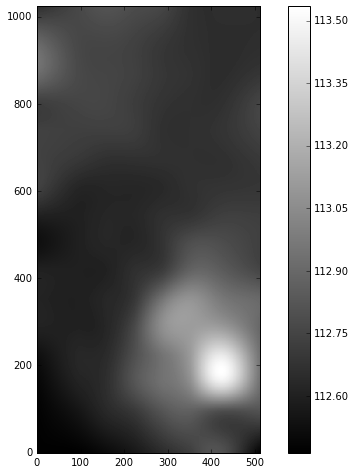

In [5]:
print 'Background'
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

Background noise


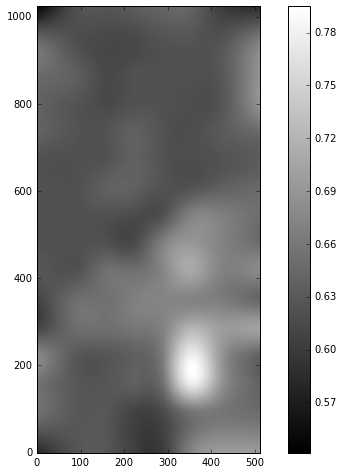

In [6]:
print 'Background noise'
bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()

In [7]:
print 'Subtract the background'
data_sub = data - bkg

Subtract the background


Object detection and plot
Number of objects detected:  1046


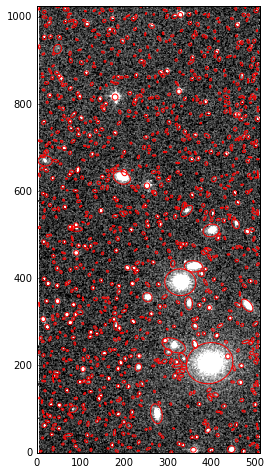

In [8]:
print 'Object detection and plot'
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)
print 'Number of objects detected: ',len(objects)

from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
im = ax.imshow(data, interpolation='nearest',vmax = 116.7, vmin = 111.5, cmap='gray', origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [9]:
print 'Aperture Photometry'
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

Aperture Photometry
object 0: flux = nan +/- 3.063365
object 1: flux = 15.050590 +/- 5.076055
object 2: flux = 31.385602 +/- 6.404954
object 3: flux = 19.558721 +/- 5.549556
object 4: flux = 26.356557 +/- 6.130217
object 5: flux = 16.057726 +/- 5.218541
object 6: flux = 255.602114 +/- 16.335268
object 7: flux = 25.010533 +/- 6.015478
object 8: flux = 273.382337 +/- 16.870250
object 9: flux = 19.500813 +/- 5.537184


In [10]:
print 'FLUX_RADIUS'
r, flag = sep.flux_radius(data, objects['x'], objects['y'], 6.*objects['a'], 0.5,
                          normflux=flux, subpix=5)
#print r,flag

r, flag = sep.flux_radius(data, objects['x'], objects['y'], 6.*objects['a'],
                          [0.5, 0.6], normflux=flux, subpix=5)
#print r,flag

FLUX_RADIUS


In [11]:
for i in range(len(objects)):
    print 'object: ', i,',', 'thresh: ', objects['thresh'][i],',', 'x: ', objects['x'][i],',', 'y : ', objects['y'][i]

object:  0 , thresh:  0.944276332855 , x:  507.621679735 , y :  1.18973113162
object:  1 , thresh:  0.944276332855 , x:  75.9623454817 , y :  1.9859575873
object:  2 , thresh:  0.944276332855 , x:  308.318068178 , y :  1.30376178722
object:  3 , thresh:  0.944276332855 , x:  8.71098223871 , y :  3.11505952346
object:  4 , thresh:  0.944276332855 , x:  183.227139111 , y :  3.45894972285
object:  5 , thresh:  0.944276332855 , x:  232.599814642 , y :  4.2073838207
object:  6 , thresh:  0.944276332855 , x:  473.48447015 , y :  3.25272783759
object:  7 , thresh:  0.944276332855 , x:  123.934002688 , y :  6.4203477991
object:  8 , thresh:  0.944276332855 , x:  398.881833256 , y :  5.8172984112
object:  9 , thresh:  0.944276332855 , x:  163.009776283 , y :  9.48224952841
object:  10 , thresh:  0.944276332855 , x:  96.8002440205 , y :  6.01039387144
object:  11 , thresh:  0.944276332855 , x:  255.728068077 , y :  8.97439133812
object:  12 , thresh:  0.944276332855 , x:  37.2166223134 , y :  9.

Depois de produzirmos o catálogo, temos que pegar x e y(pixels), e tranformar em RA e Dec, para podermos comparar com o catálogo do ds9.

In [12]:
print 'Convert pixel coordinates to RA and DEC'
from astropy.wcs import WCS
w = WCS('Abell426.fits')
xlist = []
ylist = []
ra,dec = w.all_pix2world(objects['x'],objects['y'], 0)
xlist.append(ra)
ylist.append(dec)

Convert pixel coordinates to RA and DEC


In [13]:
xlist = np.array(xlist)
ylist = np.array(ylist)

In [14]:
print 'Transpose matrix RA'
xlist = xlist.transpose()
print xlist
print xlist.shape

Transpose matrix RA
[[ 49.90955609]
 [ 50.06954219]
 [ 49.98342396]
 ..., 
 [ 50.08022706]
 [ 50.00936679]
 [ 49.92027967]]
(1046, 1)


In [15]:
print 'Transpose matrix DEC'
ylist = ylist.transpose(1,0)
print ylist
print ylist.shape

Transpose matrix DEC
[[ 41.45508532]
 [ 41.45535068]
 [ 41.45516501]
 ..., 
 [ 41.73879075]
 [ 41.73887837]
 [ 41.73851544]]
(1046, 1)


In [16]:
print 'Reading catalog from ds9(2MASS)'
from astropy.io.votable import parse_single_table
table = parse_single_table("catalogo_abell426.xml")
print table

Reading catalog from ds9(2MASS)
 _RAJ2000   _DEJ2000   RAJ2000    DEJ2000   ... Bflg Cflg Xflg Aflg
   deg        deg        deg        deg     ...                    
---------- ---------- ---------- ---------- ... ---- ---- ---- ----
 49.846077  41.491169  49.846077  41.491169 ...  111  000    2    0
 49.855790  41.484360  49.855790  41.484360 ...  111  000    2    0
 49.842343  41.493237  49.842343  41.493237 ...  111  000    2    0
 49.874863  41.483654  49.874863  41.483654 ...  111  000    0    0
 49.924776  41.499546  49.924776  41.499546 ...  111  000    0    0
 49.912190  41.485409  49.912190  41.485409 ...  111  000    0    0
 49.914257  41.494675  49.914257  41.494675 ...  111  000    0    0
 49.922114  41.455688  49.922114  41.455688 ...  111  000    0    0
 49.927692  41.462391  49.927692  41.462391 ...  111  000    0    0
 49.905286  41.485962  49.905286  41.485962 ...  111  000    0    0
       ...        ...        ...        ... ...  ...  ...  ...  ...
 50.084807  41.6

A matriz xlist e ylist tem a forma (1,1046) e a do catálogo(ds9) tem a forma (638,1), com isso, fizemos a matriz transposta da xlist e da ylist para podemos fazer o match entre elas.

In [20]:
print 'Match'
from astropy.coordinates import SkyCoord
from astropy import units as u
cd = SkyCoord(ra=xlist*u.degree, dec=ylist*u.degree)  
ct = SkyCoord(ra=table.array['RAJ2000']*u.degree, dec=table.array['DEJ2000']*u.degree)
idxd, d2dd, d3d = cd.match_to_catalog_sky(ct) 
idxt, d2dt, d3d = ct.match_to_catalog_sky(cd) 
print len(idxd)
print len(idxt)

from astropy.coordinates import match_coordinates_sky
idxcd, idxct, d2d, d3d = cd.search_around_sky(ct, 10*u.arcsec)
print len(idxcd)
print len(idxct)

Match
1046
638
411
411


Variable noise


1

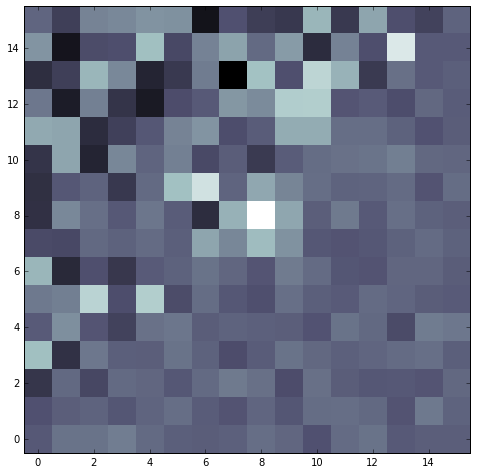

In [21]:
print 'Variable noise'
n = 16
X, Y = np.meshgrid(np.arange(n), np.arange(n))
mask = Y > X
error = np.ones((n, n))
error[mask] = 4.0
data = error * np.random.normal(size=(n, n))

source = 3.0 * np.array([[1., 2., 1.],
                         [2., 4., 2.],
                         [1., 2., 1.]])
m = n // 2 - 1
data[m:m+3, m:m+3] += source

plt.imshow(data, interpolation='nearest', origin='lower', cmap='bone')

objects = sep.extract(data, 3.0, err=error, filter_type='conv')
len(objects)

objects = sep.extract(data, 3.0, err=error, filter_type='matched')
len(objects)